# After Training

In this exercise, you will create a deep learning model, save it, and load it to evaluate its performance on unseen data.

In [15]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [16]:
# Upload data to Colab
from google.colab import files

# Upload music.csv
csv_file = files.upload()

Saving music.csv to music (2).csv


In [17]:
# Read csv into DataFrame
df = pd.read_csv("music.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,-0.105672,1.728885,1.788986,0.849798,-1.109353,0.537904,-0.115368,5.069512,6.007710,0.820869,0.896190,0.131699,0.859286,2.059065,0.266773,1.192932,-1.421091,2.128661,-1.288109,1.458738,-0.734508,-0.092678,-0.571314,-0.142634,2.748619,3.099077,0.317270,-0.130580,2.048282,-0.173489,0.324616,-0.300817,0.471089,-0.538577,-0.979124,-0.679165,0.135963,-1.094049,-0.072197,-0.752002,-0.660715,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,0.389178,-0.944584,-0.043610,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,0.029105,0.407297,-0.034418,-0.000607,-1.587712,-0.134767,0.679050,0.867759,0.549205,-0.357172,-0.578459,0.293603,-0.369997,-0.360397,-0.088276,-0.684480,-0.420736,0.263000,0.074617,0.277973,0.468588,0.978996,0.586847,0.760345,1.400111,0.943587,-0.402494,0.058298,-0.221967,-0.302481,-0.539966,0.179847,-0.634147,-0.252916,-0.441251,-0.342925,0.628843,0.212837,-0.038171,-0.440290,-0.157062,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.653021,-0.082645,-0.947933,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,-0.903893,-0.791393,-1.667463,-0.334004,-0.151747,1.210807,1.045059,-0.672476,-0.463102,-0.747421,0.069946,0.305318,0.551537,-0.705611,-0.301218,-0.365297,0.062184,0.366565,0.870098,1.483239,0.614040,1.568182,1.743709,1.388536,-0.694375,-0.285767,-0.291778,-0.274901,-0.351297,0.439170,-0.663293,0.056928,0.801809,0.326462,0.579646,0.991642,1.612214,0.472009,1.060355,1.070834,0.408001,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-1.198657,-0.797954,-0.556109,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,0.024625,0.429205,0.576029,0.400389,0.519513,0.509497,1.303073,-0.055956,0.001966,2.255016,0.332082,-0.051894,0.376492,1.169377,-0.733187,0.672438,0.979776,0.390647,-0.519658,-0.675643,0.292994,0.349806,-0.058874,-0.521205,1.658281,1.254224,2.535289,0.537780,0.190260,-0.156088,0.707729,-1.073155,-0.428863,-0.663483,-0.304159,-0.203572,-0.200971,1.212091,1.193691,0.609952,-0.296156,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.788367,-0.805626,0.166616,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,-0.287746,1.824638,-0.861848,-0.229361,-0.966604,0.278767,0.060231,0.035642,-0.044704,-0.718237,-0.733049,-1.136788,-1.301985,-0.312192,-0.671557,-0.579330,-0.772117,-0.371718,-0.483820,0.068485,0.682731,0.867177,0.769446,1.226698,0.557925,0.175588,-0.324638,-0.089385,-0.186612,-0.415299,1.094179,0.298009,-0.479234,0.239411,-0.388596,-0.013394,0.517086,0.120622,0.317070,0.287059,0.607333,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.052781,-0.180181,-0.500785,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [18]:
# Define the features set 'X', and the target 'y' set.
X = df.iloc[:, 0:67].values
y = df.iloc[:, 68:70].values

In [19]:
# Split the data into traning and testing sets using the train_test_split method from sklearn.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# Scale the data for the features set X_tain and X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Create a neural network with 1 hidden layer
nn = Sequential()

nn.add(Dense(units=8, input_dim=67, activation="relu"))
nn.add(Dense(units=2, activation="linear"))

In [22]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_1 = nn.fit(X_train_scaled, y_train, epochs=800, verbose=0)

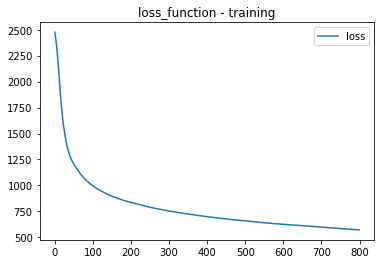

In [23]:
# Plot the train function
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(model_1.history["loss"])
plt.title("loss_function - training")
plt.legend(["loss"])
plt.show()

In [24]:
# Save model as JSON
nn_json = nn.to_json()
file_path = "model.json"
with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = "model.h5"
nn.save_weights(file_path)

In [25]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json

# Load json and create model
file_path = "model.json"
with open(file_path, "r") as json_file:
    model_json = json_file.read()
loaded_model = model_from_json(model_json)

# Load weights into new model
file_path = "model.h5"
loaded_model.load_weights(file_path)

In [26]:
# Predict values using the testing data
from sklearn.metrics import mean_squared_error

y_pred = loaded_model.predict(X_test_scaled)

In [27]:
# Evaluate the model with the MSE metric
print(mean_squared_error(y_test, y_pred))

1037.9519067210636
